In [40]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

# Load

In [41]:
classes = ['Hairline Fracture', 'Fracture Dislocation', 'Pathological fracture', 'Greenstick fracture', 'Spiral Fracture', 'Compression-Crush fracture', 'Impacted fracture', 'Comminuted fracture', 'Intra-articular fracture', 'Longitudinal fracture', 'Oblique fracture', 'Avulsion fracture']
image_files = get_image_files_recursively("/kaggle/input/bone-break-classifier-dataset", classes)

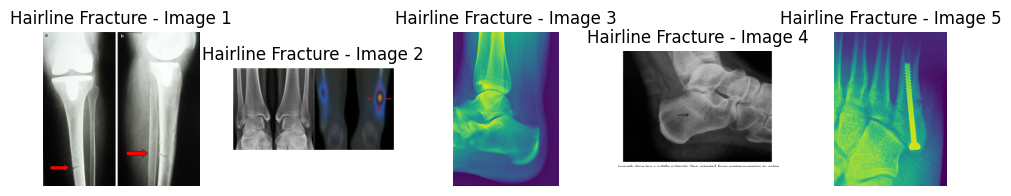

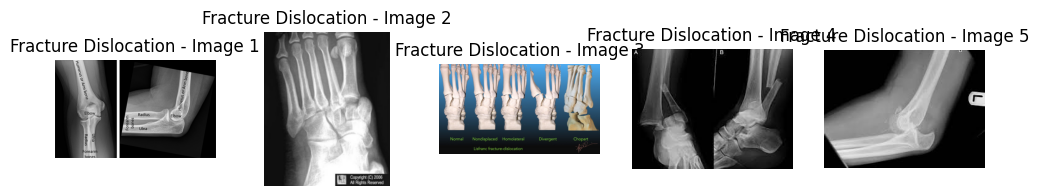

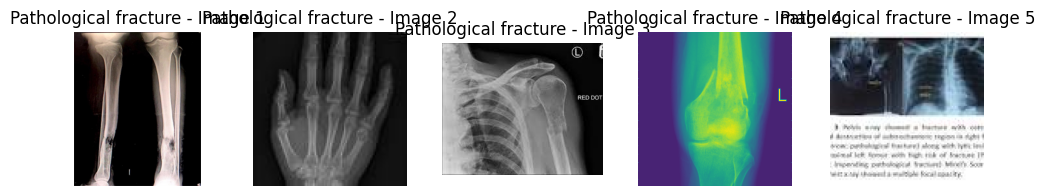

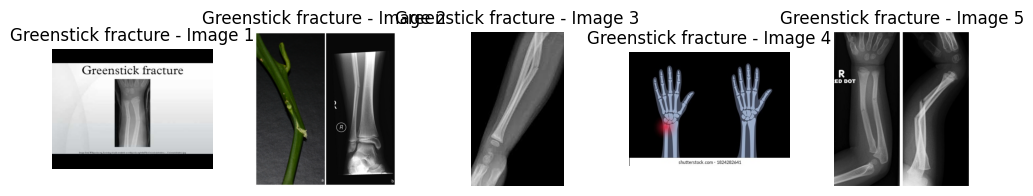

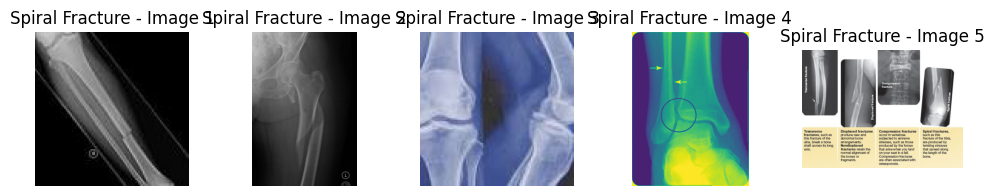

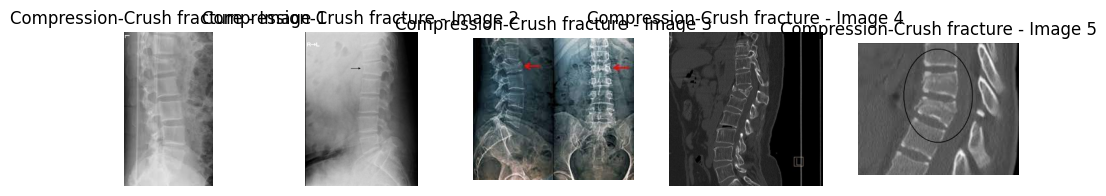

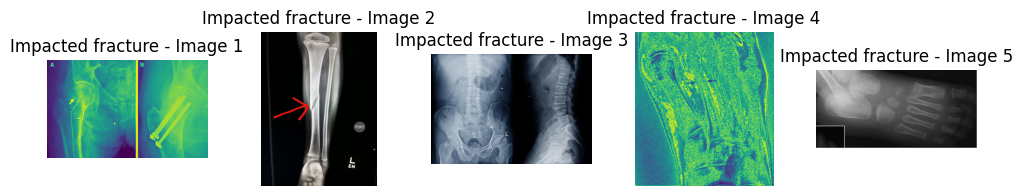

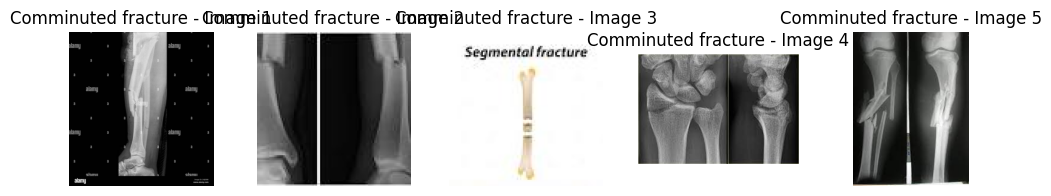

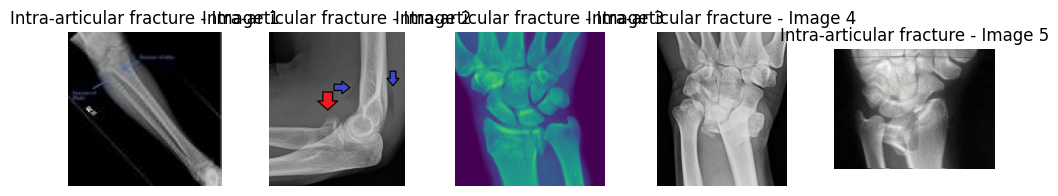

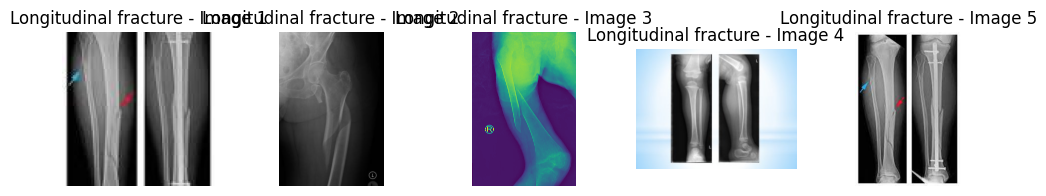

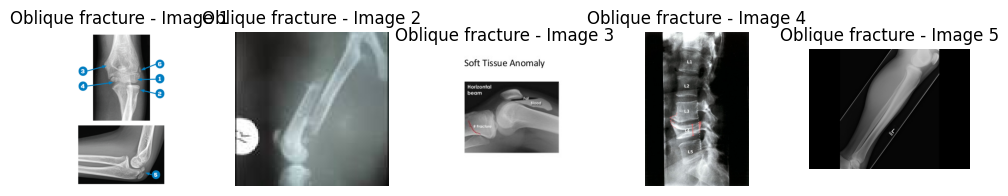

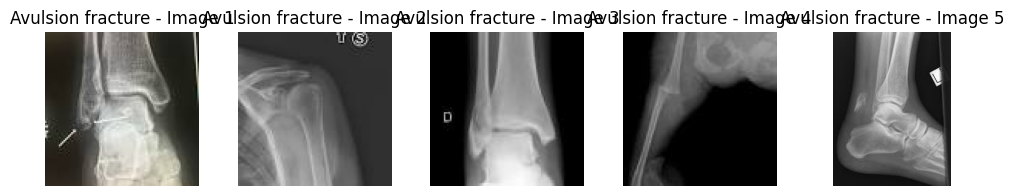

In [42]:
display_random_images_per_class(image_files)

# Model

In [43]:
import numpy as py
from matplotlib import pyplot as plt

In [44]:
batch_size = 64
base_dir = 'data'

In [45]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

In [46]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/bone-break-classifier-dataset',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Avulsion fracture','Comminuted fracture','Compression-Crush fracture','Fracture Dislocation',
                  'Greenstick fracture','Hairline Fracture','Impacted fracture','Intra-articular fracture',
                  'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],# Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 1685 images belonging to 12 classes.


In [47]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(12, activation='softmax')
])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)      

In [49]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 50

In [50]:
history = model.fit(train_generator, steps_per_epoch=int(total_sample/batch_size), epochs=n_epochs, verbose=1)

Epoch 1/50
26/26 [==============================] - 12s 395ms/step - loss: 2.4793 - acc: 0.1123
Epoch 2/50
26/26 [==============================] - 11s 423ms/step - loss: 2.4541 - acc: 0.1258
Epoch 3/50
26/26 [==============================] - 11s 436ms/step - loss: 2.3865 - acc: 0.1567
Epoch 4/50
26/26 [==============================] - 11s 422ms/step - loss: 2.3081 - acc: 0.2085
Epoch 5/50
26/26 [==============================] - 11s 397ms/step - loss: 2.2096 - acc: 0.2511
Epoch 6/50
26/26 [==============================] - 11s 420ms/step - loss: 2.0758 - acc: 0.2930
Epoch 7/50
26/26 [==============================] - 11s 420ms/step - loss: 1.9615 - acc: 0.3523
Epoch 8/50
26/26 [==============================] - 11s 419ms/step - loss: 1.8198 - acc: 0.3831
Epoch 9/50
26/26 [==============================] - 11s 408ms/step - loss: 1.6413 - acc: 0.4590
Epoch 10/50
26/26 [==============================] - 12s 452ms/step - loss: 1.4950 - acc: 0.5120
Epoch 11/50
26/26 [====================

In [51]:
model.save('model.h5')

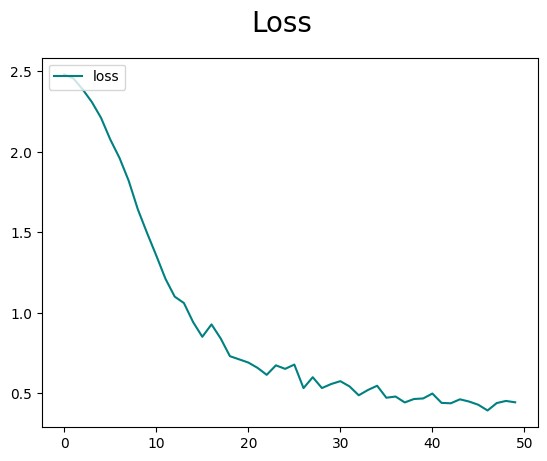

In [52]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

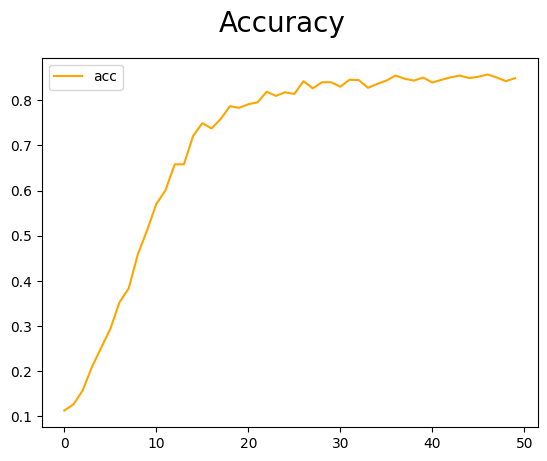

In [53]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Predicting the Model on Test data.**

In [54]:
from tensorflow.keras.preprocessing import image

In [57]:
test_image = image.load_img('/kaggle/input/bone-break-classifier-dataset/Hairline Fracture/Hairline Fracture/A320567_1_En_5_Fig4_HTML.jpg', target_size = (200,200))

In [59]:
test_image = image.load_img('/kaggle/input/bone-break-classifier-dataset/Oblique fracture/Oblique fracture/21135tn.jpg', target_size = (200,200))

In [62]:
test_image = image.load_img('/kaggle/input/bone-break-classifier-dataset/Oblique fracture/Oblique fracture/ACEP_0820_pg21a.png', target_size = (200,200))

In [63]:
test_image = image.load_img('/kaggle/input/bone-break-classifier-dataset/Hairline Fracture/Hairline Fracture/20983tn.jpg', target_size = (200,200))

In [64]:
file_name = ['/kaggle/input/bone-break-classifier-dataset/Hairline Fracture/Hairline Fracture/20983tn.jpg',
'/kaggle/input/bone-break-classifier-dataset/Hairline Fracture/Hairline Fracture/2995c0750ed98208c238f4b6a27ddd_jumbo.jpg',
'/kaggle/input/bone-break-classifier-dataset/Impacted fracture/Impacted fracture/19801tn.jpg',
'/kaggle/input/bone-break-classifier-dataset/Impacted fracture/Impacted fracture/20980tn.jpg',
'/kaggle/input/bone-break-classifier-dataset/Comminuted fracture/Comminuted fracture/2.jpg',
'/kaggle/input/bone-break-classifier-dataset/Longitudinal fracture/Longitudinal fracture/21151tn.jpg',
'/kaggle/input/bone-break-classifier-dataset/Spiral Fracture/Spiral Fracture/110001_jumbo.jpeg',
'/kaggle/input/bone-break-classifier-dataset/Pathological fracture/Pathological fracture/10.3928_01477447-19790101-09-fig2.jpg']

In [86]:
test_image = image.load_img(file_name[1], target_size = (200,200))

In [87]:
test_image = np.expand_dims(test_image, axis=0)

In [88]:
result = model.predict(test_image)

1/1 [==============================] - 0s 22ms/step


In [89]:
result

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Compression-Crush fracture")
elif result[0][3] == 1:
    print("Fracture Dislocation")
elif result[0][4] == 1:
    print("Greenstick fracture")
elif result[0][5] == 1:
    print("Hairline fracture")
elif result[0][6] == 1:
    print("Impacted Dislocation")
elif result[0][7] == 1:
    print("Intra-articluar fracture")
elif result[0][8] == 1:
    print("Longitudinal fracture")
elif result[0][9] == 1:
    print("Oblique Dislocation")
elif result[0][10] == 1:
    print("Pathological fracture")
elif result[0][11] == 1:
    print("Spiral fracture")
else:
    print("Unknown")

Fracture Dislocation
